In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('D:\library\Github\Innovative-practice\library\csv\第二学期'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\library\Github\Innovative-practice\library\csv\第二学期\test.csv
D:\library\Github\Innovative-practice\library\csv\第二学期\train.csv


In [30]:
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [31]:
train = pd.read_csv('D:/library/Github/Innovative-practice/library/csv/第二学期/train.csv')
test = pd.read_csv('D:/library/Github/Innovative-practice/library/csv/第二学期/test.csv')

In [32]:
train.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# All values after row 6479 are NaN.
train  = train.drop(train.index[6480:])
train.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0
6479,6479.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,adult-cola,glass,500ml,1.16,30413.0


In [34]:
pd.DataFrame(train.groupby(['brand', 'container'], axis =0, as_index=True).count()['id'])

id
brand        container     
adult-cola   can        430
             glass      432
             plastic    432
gazoza       can        431
             glass      429
             plastic    431
kinder-cola  can        431
             glass      431
             plastic    432
lemon-boost  can        431
             glass      432
             plastic    431
orange-power can        430
             glass      430
             plastic    431

In [35]:
gazoza_train = train[train['brand'] == 'gazoza'].reset_index(drop=True)

# Fill in the missing contiainer types
gazoza_train.at[340, 'container'] = 'can'
gazoza_train.at[798, 'container'] = 'glass'
gazoza_train.at[984, 'container'] = 'glass'
gazoza_train.at[1214, 'container'] = 'plastic'
gazoza_train.at[1229, 'container'] = 'glass'
# Fill in the missing capacity types
gazoza_train.at[368, 'capacity'] = '1.5lt'
gazoza_train.at[648, 'capacity'] = '500ml'
gazoza_train.at[962, 'capacity'] = '500ml'
# Choose features
# gazoza_train.drop(['id','shop','long','brand','container'], axis=1, inplace=True)
gazoza_train['date'] = pd.to_datetime(gazoza_train['date'])
# Remove the sufix of the values of the capacity column, Change into numerics
gazoza_train['capacity'] = gazoza_train['capacity'].map(lambda x: str(x)[:-2])
gazoza_train['capacity'] = pd.to_numeric(gazoza_train['capacity'])

#----------------------

gazoza_test = test[test['brand'] == 'gazoza'].reset_index(drop=True)
# Fill in the missing capacity types
gazoza_test.at[208, 'capacity'] = '330ml'
gazoza_test.at[209, 'capacity'] = '500ml'
# Choose features
# gazoza_test.drop(['id','shop','long','brand','container'], axis=1, inplace=True)
gazoza_test['date'] = pd.to_datetime(gazoza_test['date'])
# Remove the sufix of the values of the capacity column, Change into numerics
gazoza_test['capacity'] = gazoza_test['capacity'].map(lambda x: str(x)[:-2])
gazoza_test['capacity'] = pd.to_numeric(gazoza_test['capacity'])

# -----------------------
gazoza_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         216 non-null    int64         
 1   date       216 non-null    datetime64[ns]
 2   city       216 non-null    object        
 3   lat        213 non-null    float64       
 4   long       211 non-null    float64       
 5   pop        216 non-null    int64         
 6   shop       216 non-null    object        
 7   brand      216 non-null    object        
 8   container  216 non-null    object        
 9   capacity   216 non-null    float64       
 10  price      216 non-null    float64       
 11  quantity   216 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 20.4+ KB


In [36]:
# Fill in the missing values for lat column of training set
gazoza_train['lat'] = gazoza_train.apply(lambda row: 37.97945 if (row['shop'] == 'shop_1') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 35.32787 if (row['shop'] == 'shop_2') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 37.96245 if (row['shop'] == 'shop_3') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 39.63689 if (row['shop'] == 'shop_5') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 38.24444 if (row['shop'] == 'shop_6') else row['lat'],axis=1)

# Fill in the missing values for long column of training set
gazoza_train['long'] = gazoza_train.apply(lambda row: 23.68708 if (row['shop'] == 'shop_3') else row['long'],axis=1)
gazoza_train['long'] = gazoza_train.apply(lambda row: 22.93086 if (row['shop'] == 'shop_4') else row['long'],axis=1)
gazoza_train['long'] = gazoza_train.apply(lambda row: 21.73444 if (row['shop'] == 'shop_6') else row['long'],axis=1)

# Fill in the missing values for lat column of testing set
gazoza_test['lat'] = gazoza_test.apply(lambda row: 37.96245 if (row['shop'] == 'shop_3') else row['lat'],axis=1)
gazoza_test['lat'] = gazoza_test.apply(lambda row: 39.63689 if (row['shop'] == 'shop_5') else row['lat'],axis=1)


# Fill in the missing values for long column of testing set
gazoza_test['long'] = gazoza_test.apply(lambda row: 23.68708 if (row['shop'] == 'shop_3') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 21.73444 if (row['shop'] == 'shop_6') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 25.14341 if (row['shop'] == 'shop_2') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 23.71622 if (row['shop'] == 'shop_1') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 22.41761 if (row['shop'] == 'shop_5') else row['long'],axis=1)

In [37]:
gazoza_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1296 non-null   float64       
 1   date       1296 non-null   datetime64[ns]
 2   city       1296 non-null   object        
 3   lat        1296 non-null   float64       
 4   long       1296 non-null   float64       
 5   pop        1296 non-null   float64       
 6   shop       1296 non-null   object        
 7   brand      1296 non-null   object        
 8   container  1296 non-null   object        
 9   capacity   1296 non-null   float64       
 10  price      1296 non-null   float64       
 11  quantity   1296 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 121.6+ KB


In [38]:
gazoza_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         216 non-null    int64         
 1   date       216 non-null    datetime64[ns]
 2   city       216 non-null    object        
 3   lat        216 non-null    float64       
 4   long       216 non-null    float64       
 5   pop        216 non-null    int64         
 6   shop       216 non-null    object        
 7   brand      216 non-null    object        
 8   container  216 non-null    object        
 9   capacity   216 non-null    float64       
 10  price      216 non-null    float64       
 11  quantity   216 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 20.4+ KB


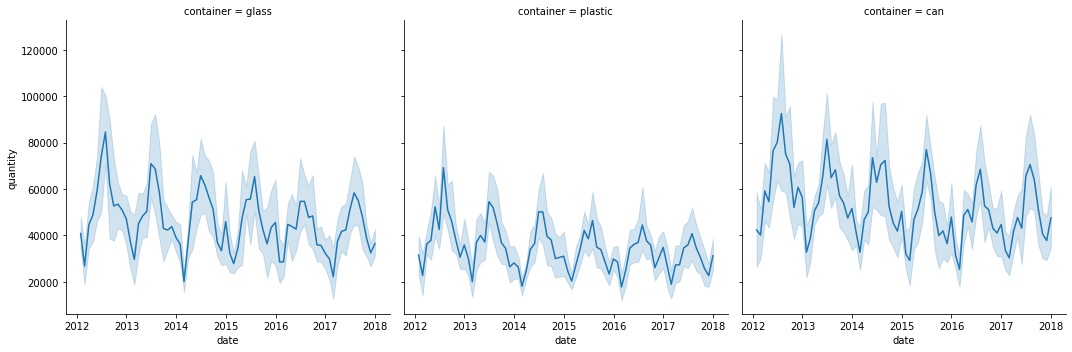

In [39]:
sns.relplot(data=gazoza_train, x='date', y='quantity', col = 'container', kind='line')

In [40]:
gazoza_train[(gazoza_train['city'] == 'Athens') & (gazoza_train['capacity'] == 1.5)]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
9,55.0,2012-01-31,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,1.16,14480.0
17,86.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,plastic,1.5,0.85,26884.0
19,97.0,2012-02-29,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,plastic,1.5,1.35,7946.0
26,143.0,2012-02-29,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,0.98,14749.0
46,235.0,2012-03-31,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,0.45,33115.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,6294.0,2017-10-31,Athens,37.96245,23.68708,665871.0,shop_3,gazoza,plastic,1.5,1.45,14238.0
1261,6309.0,2017-11-30,Athens,37.97945,23.71622,665871.0,shop_1,gazoza,plastic,1.5,1.31,19973.0
1270,6356.0,2017-11-30,Athens,37.96245,23.68708,665871.0,shop_3,gazoza,plastic,1.5,1.40,15525.0
1279,6399.0,2017-12-31,Athens,37.97945,23.71622,665871.0,shop_1,gazoza,plastic,1.5,1.31,22911.0


## Time Series Analysis

In [41]:
qty = pd.DataFrame(gazoza_train.groupby(['date'], axis =0, as_index=True).sum()['quantity'])

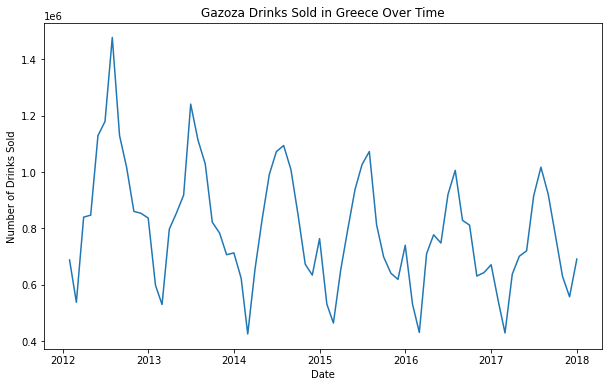

In [42]:
# Plot Graph of Gazoza sales ove the years

plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.title("Gazoza Drinks Sold in Greece Over Time")
plt.plot(qty)

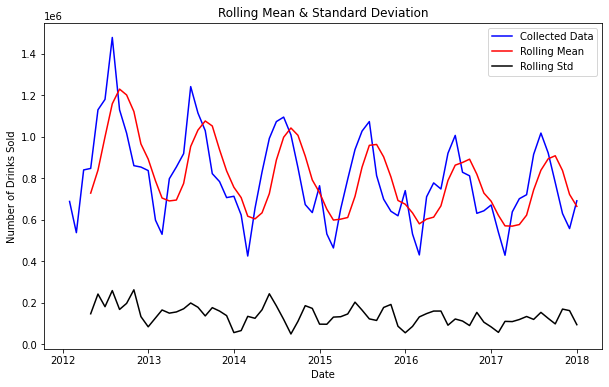

In [43]:
# Determine rolling statistics

rolmean = qty.rolling(window = 4).mean()
rolstd = qty.rolling(window = 4).std()

# Plot rolling statistics:
orig = plt.plot(qty, color='blue', label='Collected Data')
meanR = plt.plot(rolmean, color='red', label='Rolling Mean')
stdR = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.show(block = False)

Using the rolling statisitcs, we may assume that the data is not stationary over time. However, we could do Dickey-Fuller test to determine whether this is statistically supported.

In [44]:
# Perform Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

def dickeyfuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[:], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [45]:
dickeyfuller(qty)

Results of Dickey-Fuller Test:
Test Statistic                 -3.282210
p-value                         0.015693
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


According to the Dickey-Fuller test, the trend in the time series is not statistically significant at a 95% confidence level. We see that the p-value of the test is less than 0.05.

Text(0.5, 1.0, 'Log Scale Gazoza Drinks Sold in Greece Over Time')

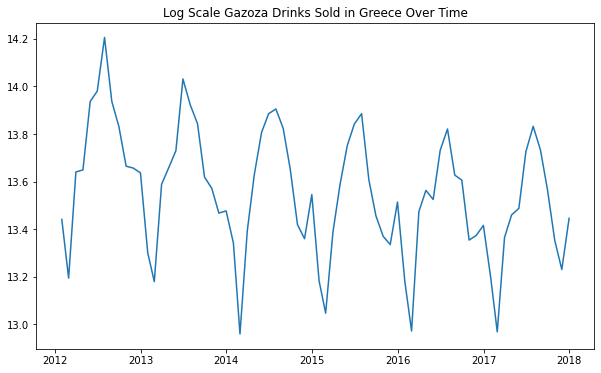

In [46]:
qty_log = np.log(qty)
plt.plot(qty_log)
plt.title("Log Scale Gazoza Drinks Sold in Greece Over Time")

In [47]:
dickeyfuller(qty_log)

Results of Dickey-Fuller Test:
Test Statistic                 -2.783541
p-value                         0.060664
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


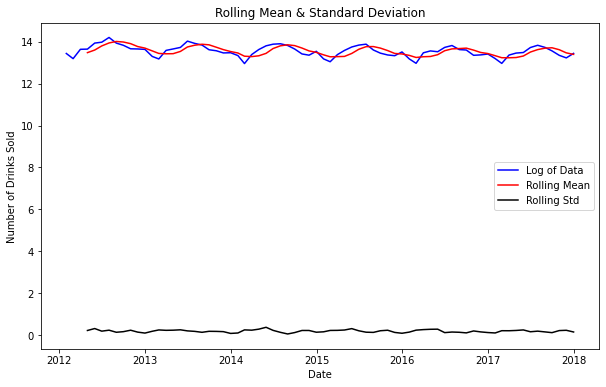

In [48]:
# Determine rolling statistics

rolmean_log = qty_log.rolling(window = 4).mean()
rolstd_log = qty_log.rolling(window = 4).std()

# Plot rolling statistics:
orig_log = plt.plot(qty_log, color='blue', label='Log of Data')
meanR_log = plt.plot(rolmean_log, color='red', label='Rolling Mean')
stdR_log = plt.plot(rolstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.show(block = False)

Results of Dickey-Fuller Test:
Test Statistic                 -3.949897
p-value                         0.001697
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


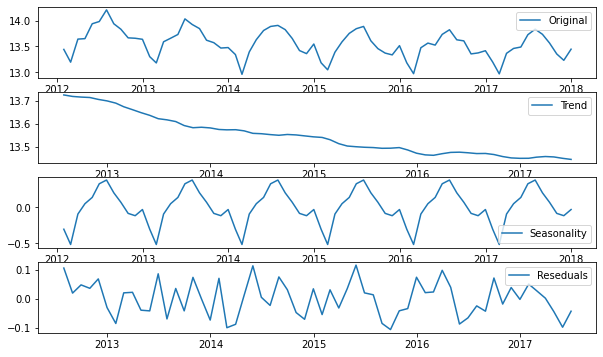

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
desomposition = seasonal_decompose(qty_log)

trend = desomposition.trend
seasonal = desomposition.seasonal
resedual = desomposition.resid

plt.subplot(411)
plt.plot(qty_log, label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resedual, label ='Reseduals')
plt.legend(loc='best')

decomposedLogData = resedual
decomposedLogData.dropna(inplace = True)
dickeyfuller(decomposedLogData)

Text(0.5, 1.0, 'Shift values to use in forecasting')

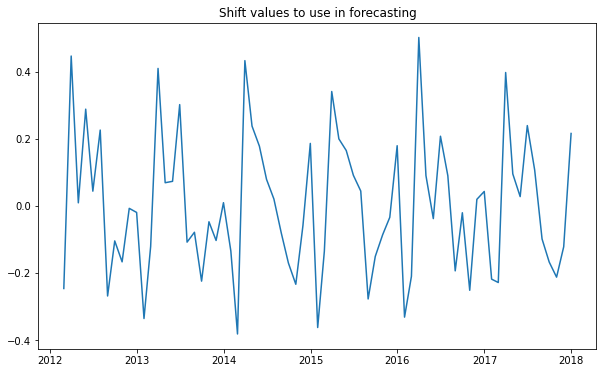

In [50]:
dataLogDiffShifting = qty_log - qty_log.shift()
plt.plot(dataLogDiffShifting)
plt.title("Shift values to use in forecasting")

In [51]:
dataLogDiffShifting.dropna(inplace=True)

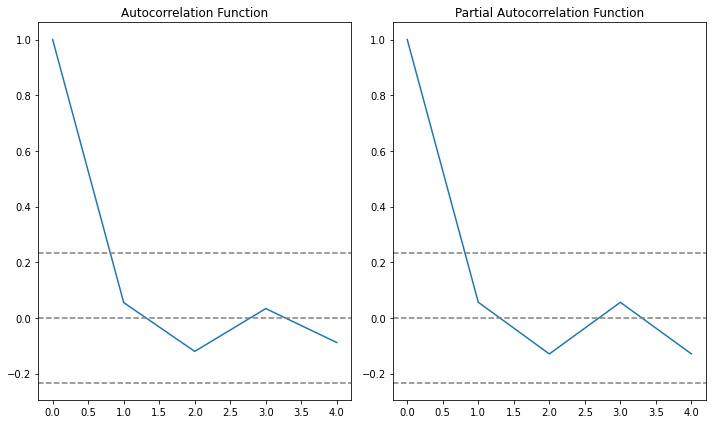

In [52]:
#ACF  and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataLogDiffShifting, nlags = 4)
lag_pacf = pacf(dataLogDiffShifting, nlags = 4, method = 'ols') # ordinary least square

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [53]:
import pmdarima as pm
modl = pm.auto_arima(qty_log,
                     start_p=1,  # p最小值
                     start_q=1,  # q最小值
                     start_P=1,
                     start_Q=1,
                     max_p=6,  # p最大值
                     max_q=6,  # q最大值
                     max_P=6,
                     max_Q=6,
                     seasonal=True,
                     stepwise=True,  # 当stepwise为False是则不进行完全组合遍历
                     suppress_warnings=True, D=5, max_D=5,
                     error_action='ignore'
                     )
modl

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [54]:
import statsmodels.tsa.stattools as st
model = st.arma_order_select_ic(dataLogDiffShifting, max_ar=5, max_ma=5, ic=['aic', 'bic', 'hqic'])
model.bic_min_order #返回一个元组，分别为p值和q值

C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  wa

(2, 2)

C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Plotting AR Model


C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


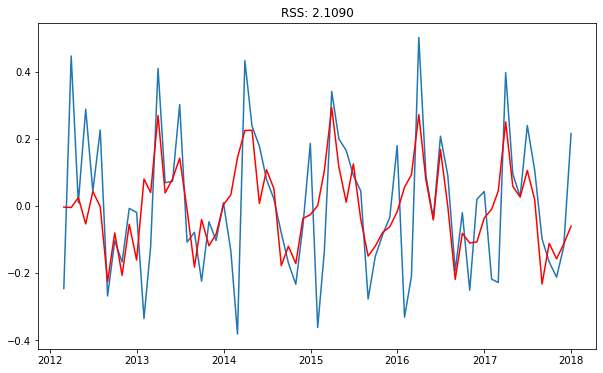

In [55]:
from statsmodels.tsa.arima.model import ARIMA

#AR Model
model = ARIMA(dataLogDiffShifting, order = (5,0,2)) #P, d, Q values
results_AR = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dataLogDiffShifting['quantity'])**2))
print('Plotting AR Model')

C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\weixiabing\.virtualenvs\Innovative-practice-HHChy52D\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Plotting AR Model


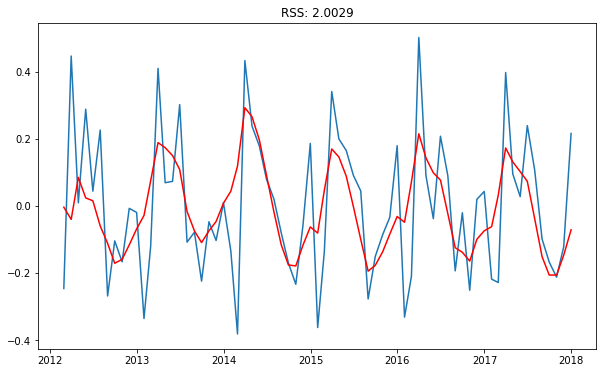

In [56]:
from statsmodels.tsa.arima.model import ARIMA

#AR Model
model = ARIMA(dataLogDiffShifting, order = (2,0,2)) #P, d, Q values
results_AR = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dataLogDiffShifting['quantity'])**2))
print('Plotting AR Model')